In [19]:
import pandas as pd
# import matplotlib.pylab as plt
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## Battery and assault
df = pd.read_csv('ResourcesCH/data3_load_assault_group_to_ML.csv',parse_dates =["Booking_year_month"])
df.head()

,Unnamed: 0,Booking_year_month,total_crime,total_crime_3,age<25_3,age26-50_3,age>50_3,day_of_week_Monday_3,day_of_week_Tuesday_3,day_of_week_Wednesday_3,...,day_of_week_Friday_1,day_of_week_Saturday_1,day_of_week_Sunday_1,summer_1,spring_1,winter_1,autum_1,CityRN_FOREIGN_1,CityRN_HOMELESS_1,CityRN_MIAMI_1
0,3,2015-08-01,153,14.0,3.0,7.0,4.0,0.0,0.0,0.0,...,23.0,21.0,14.0,1.0,0.0,0.0,0.0,2.0,52.0,54.0
1,4,2015-09-01,121,132.0,13.0,91.0,28.0,22.0,13.0,23.0,...,18.0,22.0,32.0,1.0,0.0,0.0,0.0,5.0,43.0,68.0
2,5,2015-10-01,156,142.0,18.0,92.0,32.0,14.0,13.0,29.0,...,13.0,10.0,16.0,1.0,0.0,0.0,0.0,5.0,44.0,46.0
3,6,2015-11-01,114,153.0,15.0,112.0,26.0,24.0,17.0,20.0,...,18.0,26.0,23.0,0.0,0.0,0.0,1.0,4.0,46.0,75.0
4,7,2015-12-01,129,121.0,11.0,84.0,26.0,13.0,22.0,23.0,...,13.0,17.0,8.0,0.0,0.0,0.0,1.0,3.0,42.0,52.0


In [20]:
df.columns

Index(['Unnamed: 0', 'Booking_year_month', 'total_crime', 'total_crime_3',
       'age<25_3', 'age26-50_3', 'age>50_3', 'day_of_week_Monday_3',
       'day_of_week_Tuesday_3', 'day_of_week_Wednesday_3',
       'day_of_week_Thursday_3', 'day_of_week_Friday_3',
       'day_of_week_Saturday_3', 'day_of_week_Sunday_3', 'summer_3',
       'spring_3', 'winter_3', 'autum_3', 'CityRN_FOREIGN_3',
       'CityRN_HOMELESS_3', 'CityRN_MIAMI_3', 'total_crime_2', 'Age<25_2',
       'Age26-50_2', 'Age>50_2', 'day_of_week_Monday_2',
       'day_of_week_Tuesday_2', 'day_of_week_Wednesday_2',
       'day_of_week_Thursday_2', 'day_of_week_Friday_2',
       'day_of_week_Saturday_2', 'day_of_week_Sunday_2', 'summer_2',
       'spring_2', 'winter_2', 'autum_2', 'CityRN_FOREIGN_2',
       'CityRN_HOMELESS_2', 'CityRN_MIAMI_2', 'total_crime_1', 'age<25_1',
       'age26-50_1', 'age>50_1', 'day_of_week_Monday_1',
       'day_of_week_Tuesday_1', 'day_of_week_Wednesday_1',
       'day_of_week_Thursday_1', 'day_o

In [21]:
#normalizar
#standar scaler

# Drop innecesary columns
df.drop(['Unnamed: 0', 'Booking_year_month'], axis=1, inplace=True)
# df['total_crime']= df['total_crime'].astype(float)

In [22]:
df.head()

,total_crime,total_crime_3,age<25_3,age26-50_3,age>50_3,day_of_week_Monday_3,day_of_week_Tuesday_3,day_of_week_Wednesday_3,day_of_week_Thursday_3,day_of_week_Friday_3,...,day_of_week_Friday_1,day_of_week_Saturday_1,day_of_week_Sunday_1,summer_1,spring_1,winter_1,autum_1,CityRN_FOREIGN_1,CityRN_HOMELESS_1,CityRN_MIAMI_1
0,153,14.0,3.0,7.0,4.0,0.0,0.0,0.0,0.0,3.0,...,23.0,21.0,14.0,1.0,0.0,0.0,0.0,2.0,52.0,54.0
1,121,132.0,13.0,91.0,28.0,22.0,13.0,23.0,24.0,19.0,...,18.0,22.0,32.0,1.0,0.0,0.0,0.0,5.0,43.0,68.0
2,156,142.0,18.0,92.0,32.0,14.0,13.0,29.0,28.0,23.0,...,13.0,10.0,16.0,1.0,0.0,0.0,0.0,5.0,44.0,46.0
3,114,153.0,15.0,112.0,26.0,24.0,17.0,20.0,20.0,18.0,...,18.0,26.0,23.0,0.0,0.0,0.0,1.0,4.0,46.0,75.0
4,129,121.0,11.0,84.0,26.0,13.0,22.0,23.0,24.0,13.0,...,13.0,17.0,8.0,0.0,0.0,0.0,1.0,3.0,42.0,52.0


In [32]:

# Use sklearn's `train_test_split` to split the data into training and testing

from sklearn.model_selection import train_test_split

### Arreglar quien es X y Y!!!!

X = df[['total_crime_3',
       'age<25_3', 'age26-50_3', 'age>50_3', 'day_of_week_Monday_3',
       'day_of_week_Tuesday_3', 'day_of_week_Wednesday_3',
       'day_of_week_Thursday_3', 'day_of_week_Friday_3',
       'day_of_week_Saturday_3', 'day_of_week_Sunday_3', 'summer_3',
       'spring_3', 'winter_3', 'autum_3', 'CityRN_FOREIGN_3',
       'CityRN_HOMELESS_3', 'CityRN_MIAMI_3', 'total_crime_2', 'Age<25_2',
       'Age26-50_2', 'Age>50_2', 'day_of_week_Monday_2',
       'day_of_week_Tuesday_2', 'day_of_week_Wednesday_2',
       'day_of_week_Thursday_2', 'day_of_week_Friday_2',
       'day_of_week_Saturday_2', 'day_of_week_Sunday_2', 'summer_2',
       'spring_2', 'winter_2', 'autum_2', 'CityRN_FOREIGN_2',
       'CityRN_HOMELESS_2', 'CityRN_MIAMI_2', 'total_crime_1', 'age<25_1',
       'age26-50_1', 'age>50_1', 'day_of_week_Monday_1',
       'day_of_week_Tuesday_1', 'day_of_week_Wednesday_1',
       'day_of_week_Thursday_1', 'day_of_week_Friday_1',
       'day_of_week_Saturday_1', 'day_of_week_Sunday_1', 'summer_1',
       'spring_1', 'winter_1', 'autum_1', 'CityRN_FOREIGN_1',
       'CityRN_HOMELESS_1', 'CityRN_MIAMI_1']]
y = df['total_crime'].values.reshape(-1, 1)
print(X.shape, y.shape)


# Use sklearn's `train_test_split` to split the data into training and testing
# the split of the data in not aleatory "test_size=10"

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=10)

(47, 54) (47, 1)


In [34]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)


X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#We are using the Random Forest model with 100 trees, and with the random seed = 1
model = RandomForestRegressor(n_estimators=100, random_state=1)

# Fitting our model with all of our features in X

model.fit(X_train_scaled , y_train_scaled)
y_prediction = model.predict(X_test_scaled)
y_prediction = y_scaler.inverse_transform(y_prediction)

# Calculate the MAE and MSE()
mae = mean_absolute_error(y_prediction, y_test)
mse = mean_squared_error(y_prediction, y_test)

# Please note, the MSE do not is affect by the negative difference values. ex
print("Mean Absolute Error = ", mae) 
print("Mean Squarred Erro= ", mse) 
#r2 = r2_score(y_prediction, y_test)
#print("R2 score = ", r2)

Mean Absolute Error =  13.416999999999998
Mean Squarred Erro=  225.86173000000008


C:\Users\cmuiz\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


In [41]:
# The Dtaa has been scaled, we will transform the dat
y_train_predict=model.predict(X_train_scaled)
y_train_predict=y_scaler.inverse_transform(y_train_predict)

In [37]:
y_test_predict=model.predict(X_test_scaled)
y_test_predict=y_scaler.inverse_transform(y_test_predict)

In [38]:
len(y_train_predict)

37

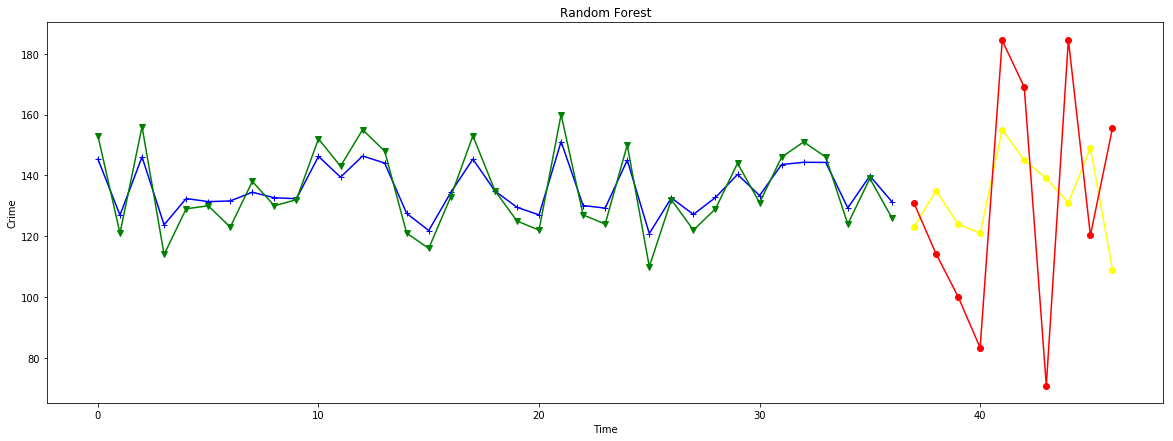

In [56]:
## Plot The Train data predicted vs the train Dta.
## and the test prodict vs the test

plt.figure(figsize=(20,7))
date_train_range = range(len(y_train_predict))
plt.plot(date_train_range , y_train_predict, marker='+', color='blue')
plt.plot(date_train_range , y_train, marker='v', color='green')
date_test_range = range(len(y_train_predict),len(y))
plt.plot(date_test_range, y_test, marker='8', color='yellow')
plt.plot(date_test_range, y_test_predict, marker='o', color='red')
plt.title("Random Forest")
plt.xlabel("Time")
plt.ylabel("Crime")
plt.savefig("RandomForest.png")

In [42]:
# The original data has an array format, to can get the differer=nce we need to :

date_train_range = np.array([i for i in date_train_range])
date_test_range = np.array([i for i in date_test_range])

# the values for ythe Residual plot
train_perc =np.array((y_train.reshape(-1,1) - y_train_predict.reshape(-1,1))*100/y_train.reshape(-1,1))
test_perc =np.array((y_test.reshape(-1,1) - y_test_predict.reshape(-1,1))*100/y_test.reshape(-1,1))
#train_perc

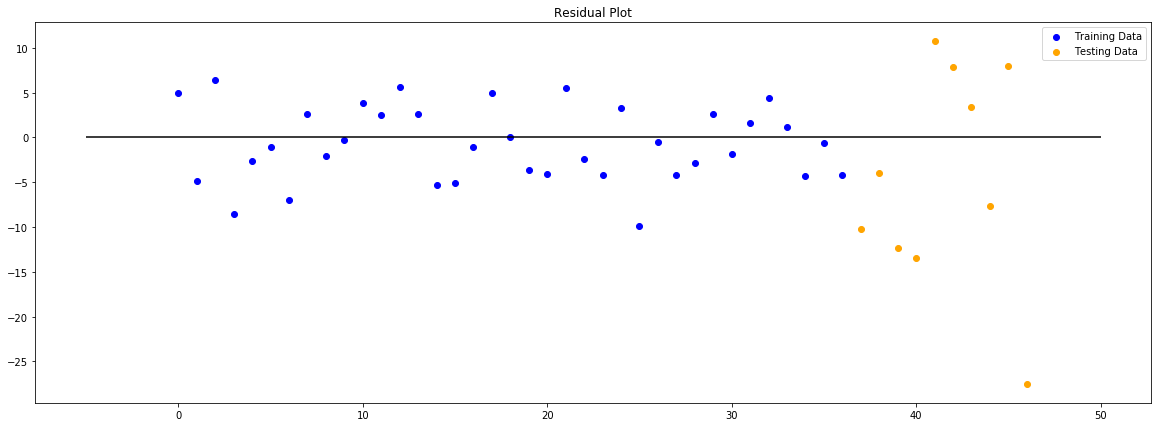

<Figure size 432x288 with 0 Axes>

In [44]:
# #Residual Plot
plt.figure(figsize=(20,7))



plt.scatter(date_train_range, train_perc, c="blue", label="Training Data")
plt.scatter(date_test_range, test_perc, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=-5, xmax=50)
plt.title("Residual Plot")
plt.show()
plt.savefig("Residual_Plot.png")

In [46]:
# ## Linear Regression

# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# model = LinearRegression()
# # Fitting our model with all of our features in X
# model.fit(X_train_scaled , y_train_scaled)
# y_prediction = model.predict(X_test_scaled)
# y_prediction = y_scaler.inverse_transform(y_prediction)
# mae = mean_absolute_error(y_prediction, y_test)
# mse = mean_squared_error(y_prediction, y_test)
# r2 = r2_score(y_prediction, y_test)
# print("Mean Absolute Error = ", mae)
# print("Mean Squarred Erro= ", mse)
# print("R2 score = ", r2)

In [47]:
# y_train_predict=model.predict(X_train_scaled)
# y_train_predict=y_scaler.inverse_transform(y_train_predict)

In [49]:
# y_test_predict=model.predict(X_test_scaled)
# y_test_predict=y_scaler.inverse_transform(y_test_predict)

In [50]:
# len(y_train_predict)

In [51]:
# plt.figure(figsize=(20,7))

# x_train = range(len(y_train_predict))
# plt.plot(x_train, y_train_predict, marker='+', color='blue')
# plt.plot(x_train, y_train, marker='v', color='green')
# x_test = range(len(y_train_predict),len(y))
# plt.plot(x_test, y_test, marker='8', color='yellow')
# plt.plot(x_test, y_test_predict, marker='o', color='red')


In [52]:
# #Residual Plot
# plt.figure(figsize=(20,7))

# plt.scatter(x_train, y_train_predict - y_train, c="blue", label="Training Data")
# plt.scatter(x_test, y_test_predict - y_test, c="orange", label="Testing Data")
# plt.legend()
# plt.hlines(y=0, xmin=-10, xmax=60)
# plt.title("Residual Plot")
# plt.show()

In [ ]:
#model.predict(X_test_scaled)

In [ ]:
#y_test_scaled

In [ ]:
#y_scaler.inverse_transform(y_test_scaled)

In [ ]:
#y_pred=model.predict(X_test_scaled)
#y_scaler.inverse_transform(y_pred)